**HW3- Image Clustering**

Identifier: Kaustubh

G01314326

In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.preprocessing import normalize as nor
from sklearn.preprocessing import LabelEncoder 

# IRIS DATASET

In [23]:
iris = pd.read_csv('iris.data',header=None)
iris.columns = ['f1','f2','f3','f4','target']
irisV = iris.drop(iris.columns[4], axis=1)

In [ ]:
irisArray = irisV.values
irisArray

Applying dimensionality reduction

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=400)
tsneIRIS_data = tsne.fit_transform(irisArray)
tsneIRIS_data

In [ ]:
pca = PCA(n_components = 2)
pcaIRIS_data = pca.fit_transform(irisArray)
pcaIRIS_data

K MEANS function

In [28]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(distance.cosine(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

K-Means Implementation

In [29]:
def k_means(k, data):
    centroids = [data[i+2] for i in range(k)]
    cluster = [0]*len(data)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, data, centroids)
        cg_new = compute_centroids(k, data, cluster)
        cg_change = measure_change(cg_new, centroids)
        centroids = cg_new
    return cluster

In [30]:
for i in range(2,4):
  cluster_IRIS = k_means(i, irisArray)
  clusterTSNE_IRIS = k_means(i, tsneIRIS_data)
  clusterPCA_IRIS = k_means(i, pcaIRIS_data)

  print('For K-',i,'IRIS- VScore: ',v_measure_score(y,cluster_IRIS))
  print('For K-',i,'IRIS- VScore (TSNE): ',v_measure_score(y,clusterTSNE_IRIS))
  print('For K-',i,'IRIS- VScore (PCA): ',v_measure_score(y,clusterPCA_IRIS))
  print('')

  score = silhouette_score(irisArray, cluster_IRIS)
  KMeansPP_scoreTSNE = silhouette_score(tsneIRIS_data, clusterTSNE_IRIS)
  KMeansPP_scorePCA = silhouette_score(pcaIRIS_data, clusterPCA_IRIS)

  print('For K-',i,'IRIS- silhouette score- ',score)
  print('For K-',i,'IRIS- silhouette score (TSNE)- ',KMeansPP_scoreTSNE)
  print('For K-',i,'IRIS- silhouette score (PCA)- ',KMeansPP_scorePCA)
  print('')
  print('')

For K- 2 IRIS- VScore:  0.7336804366512104
For K- 2 IRIS- VScore (TSNE):  0.7336804366512104
For K- 2 IRIS- VScore (PCA):  0.5897196644745017

For K- 2 IRIS- silhouette score-  0.6863930543445408
For K- 2 IRIS- silhouette score (TSNE)-  0.83156985
For K- 2 IRIS- silhouette score (PCA)-  0.6737606107575783


For K- 3 IRIS- VScore:  0.6496820278112171
For K- 3 IRIS- VScore (TSNE):  0.8571871881141631
For K- 3 IRIS- VScore (PCA):  0.5786623660442618

For K- 3 IRIS- silhouette score-  0.47633773673492535
For K- 3 IRIS- silhouette score (TSNE)-  0.6372705
For K- 3 IRIS- silhouette score (PCA)-  0.46408234581722013




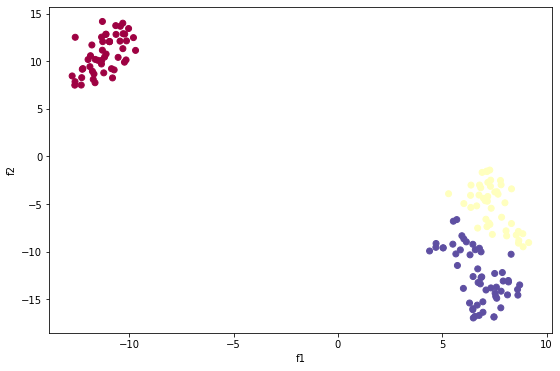

In [31]:
plt.subplots(figsize=(9,6))
plt.scatter(x=tsneIRIS_data[:,0], y=tsneIRIS_data[:,1], 
            c=clusterTSNE_IRIS, cmap=plt.cm.Spectral);
plt.xlabel('f1')
plt.ylabel('f2');
plt.savefig('final_clusters', bpi=150)

K-Means++ Implementation

In [42]:
#Calculating centroids using k means++
def kMeansPlusPlus(dataset, k):
    centroids = [dataset[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in dataset])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()

        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(dataset[i])

    return np.array(centroids)

In [43]:
kmeansPP_centroid = kMeansPlusPlus(irisArray, 3)
kmeansPP_centroid

array([[5.1, 3.5, 1.4, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [6.1, 3. , 4.6, 1.4]])

In [44]:
#Forming clusters- kmeans++
def k_meansPP(k, X, kmeansPP_centroid):
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, kmeansPP_centroid)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, kmeansPP_centroid)
        kmeansPP_centroid = cg_new
    return cluster

In [45]:
kmeansPP_cluster = k_meansPP(3, irisArray, kmeansPP_centroid )
kmeansPP_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
#target label
label = LabelEncoder()
y = label.fit_transform(iris.target.values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
#KMeans++
#v_measure_score(y,cluster)
print('VScore: ',v_measure_score(y,kmeansPP_cluster))

score = silhouette_score(irisArray, kmeansPP_cluster)

print('silhouette score- ',score)


VScore:  0.8996935451597475
silhouette score-  0.48658598412959597


# MNIST DATA **SET**

In [36]:
MNIST=pd.read_csv("MNIST.txt", delimiter=',', header=None)
MNIST.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
MNIST

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
mnistArray = MNIST.values
mnistArray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
#Normalization
dataNormalize = nor(MNIST)
dataNormalize

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
#Applying TSNE
tsne = TSNE()
TSNE_data = tsne.fit_transform(dataNormalize)
TSNE_data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ 35.713474, -44.459   ],
       [ -5.70276 , -52.657654],
       [-10.229636, -73.80126 ],
       ...,
       [-42.301147,  57.952602],
       [ 37.205414,  59.598633],
       [ 65.70264 , -38.81408 ]], dtype=float32)

In [46]:
#Calculating centroids from the data reduced by TSNE
kmeansPP_centroid_MNIST = kMeansPlusPlus(TSNE_data, 10)
kmeansPP_centroid_MNIST

array([[ 3.5713474e+01, -4.4459000e+01],
       [-3.6768612e+01,  5.1925407e+01],
       [-3.7170990e+01, -5.3747406e+01],
       [ 4.7809933e+01,  4.4804692e+00],
       [-5.8574529e+00,  5.7379192e+01],
       [-2.5690521e+01, -9.4370384e+00],
       [ 1.3133411e+01,  7.6471481e+00],
       [ 6.1469303e+01, -4.7841526e+01],
       [ 2.3458712e+01,  5.9792473e+01],
       [-3.3825382e+01, -4.1207399e-02]], dtype=float32)

In [47]:
#Cluster on TSNE reduced data
kmeansPP_cluster_MNIST = k_meansPP(10, TSNE_data, kmeansPP_centroid_MNIST )
kmeansPP_cluster_MNIST

array([0, 2, 2, ..., 1, 8, 7])

In [48]:
#Applying PCA
pca = PCA(n_components = 2)
PCA_data = pca.fit_transform(dataNormalize)
PCA_data

array([[-0.11785835,  0.12550557],
       [-0.11615034, -0.026944  ],
       [-0.0781213 ,  0.11244726],
       ...,
       [-0.16967626, -0.16998317],
       [-0.32147322,  0.03727249],
       [-0.17035023,  0.23382832]])

In [49]:
#Calculating centroids from the data reduced by PCA
kmeansPP_centroid_MNIST_PCA = kMeansPlusPlus(PCA_data, 10)
kmeansPP_centroid_MNIST_PCA

array([[-0.11785835,  0.12550557],
       [-0.13041451, -0.38168971],
       [-0.3516259 , -0.1741927 ],
       [-0.3972232 ,  0.29857259],
       [ 0.28599315,  0.07653805],
       [ 0.28019794, -0.26234355],
       [ 0.15821496, -0.02950507],
       [ 0.46267069, -0.0227401 ],
       [-0.17581342,  0.02673411],
       [ 0.5542652 , -0.12798078]])

In [50]:
#Cluster on PCA reduced data
kmeansPP_cluster_MNIST_PCA = k_meansPP(10, PCA_data, kmeansPP_centroid_MNIST_PCA )
kmeansPP_cluster_MNIST_PCA

array([3, 8, 3, ..., 2, 8, 3])

In [51]:
PCA_score_MNIST = silhouette_score(PCA_data, kmeansPP_cluster_MNIST_PCA, metric = 'cosine')
print('PCA- MNIST silhouette score- ',PCA_score_MNIST)

PCA- MNIST silhouette score-  0.6851191847725323


In [52]:
score_MNIST = silhouette_score(TSNE_data, kmeansPP_cluster_MNIST, metric = 'cosine')
print('TSNE- MNIST silhouette score- ',score_MNIST)

TSNE- MNIST silhouette score-  0.7324267


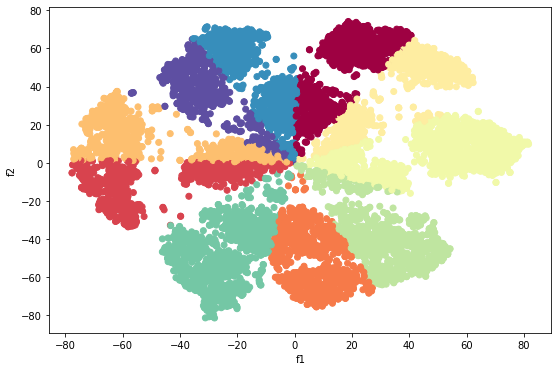

In [19]:
plt.subplots(figsize=(9,6))
plt.scatter(x=TSNE_data[:,0], y=TSNE_data[:,1], 
            c=kmeansPP_cluster_MNIST, cmap=plt.cm.Spectral);
plt.xlabel('f1')
plt.ylabel('f2');
plt.savefig('final_clusters', bpi=150)

In [20]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in kmeansPP_cluster_MNIST)
resultFile.close()

In [63]:
#for k -2 to 20
for i in range(2,21, 2):
  kmeansPP_centroid_MNIST = kMeansPlusPlus(TSNE_data, i)
  kmeansPP_cluster_MNIST = k_meansPP(i, TSNE_data, kmeansPP_centroid_MNIST)
  score_MNIST = silhouette_score(TSNE_data, kmeansPP_cluster_MNIST, metric = 'cosine')
  print('For K-',i,' MNIST silhouette score- ',score_MNIST)


For K- 2  MNIST silhouette score-  0.5864115
For K- 4  MNIST silhouette score-  0.69421494
For K- 6  MNIST silhouette score-  0.70458317
For K- 8  MNIST silhouette score-  0.74289
For K- 10  MNIST silhouette score-  0.72280467
For K- 12  MNIST silhouette score-  0.70771337
For K- 14  MNIST silhouette score-  0.6769822
For K- 16  MNIST silhouette score-  0.68723106
For K- 18  MNIST silhouette score-  0.69417554
For K- 20  MNIST silhouette score-  0.68189114
